#### Ritvik Khurana

# Research question/interests

RQ : Using this dataset to find the prime age of playing for this dataset and comparing it to top players in their prime.

In [164]:
import pandas as pd
import seaborn as sns
import traceback
import matplotlib.pyplot as plt
import numpy as np
import squarify

In [3]:
df = pd.read_csv("../data/raw/Stats.csv",encoding="ISO-8859-1", delimiter = ";").set_index('Rk')


In [4]:
df.head()

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
Rk,,,,,,,,,,,,,,,,,,,,,
1,Max Aarons,ENG,DF,Norwich City,Premier League,22.0,2000,34,32,2881,...,0.03,1.41,1.16,0.0,0.06,0.03,5.53,0.47,1.59,22.7
2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,34.0,1987,34,34,2983,...,0.00,0.06,1.39,0.0,0.03,0.00,6.77,2.02,1.36,59.8
3,Salis Abdul Samed,GHA,MF,Clermont Foot,Ligue 1,22.0,2000,31,29,2462,...,0.00,0.36,1.24,0.0,0.00,0.00,8.76,0.88,0.88,50.0
4,Laurent Abergel,FRA,MF,Lorient,Ligue 1,29.0,1993,34,34,2956,...,0.03,0.79,2.23,0.0,0.00,0.00,8.87,0.43,0.43,50.0
5,Charles Abi,FRA,FW,Saint-Étienne,Ligue 1,22.0,2000,1,1,45,...,0.00,2.00,0.00,0.0,0.00,0.00,4.00,2.00,0.00,100.0


## Milestone 3 Task 1 - EDA


There are a multitude of factors which contribute towards calculating a player's performance. Therefore in order
to identify the players in their prime and exclude outliers we need to take each of these factors in to account and
compile players who fit in most, if not all the factors' ranges. 

We also need to filter and create dataframes with players in different positions

### In order to find the prime ages for each playing position we will first need to identify columns that may come in handy 

1. Defenders
    - Short pass Accuracy (PasShoCmp%)
    - Long pass Accuracy (PasLonCmp%)
    - Tackles Won (TklWon)
2. Goalies
    - Long pass Accuracy (PasLonCmp%)
3. Attackers
    - Shots on target (SoT)
    - Shot Accuracy (G/SoT)
    - Assists (Assists)
    - Goal-creating actions (GCA)
4. Midfielders
    - Assists (Assis)
    - Goal-creating actions (GCA)
5. Factors affecting all positions
    - Pass Accuracy (PasShoCmp% + PasMedCmp% + PasLonCmp% / 3)
    - Red cards (CrdR)
    - Yellow cards (2CrdY)

In [5]:
df.head()

def_fac = ["PasShoCmp%", "PasLonCmp%", "TklWon"]
goal_fac = ["PasLonCmp%"]
atk_fac = ["SoT", "G/SoT", "Assists","GCA"]
mid_fac = ["Assists","GCA"]

df["pass_accuracy"] = (df["PasShoCmp%"] + df["PasMedCmp%"] + df["PasLonCmp%"])/3

all_fac = ["pass_accuracy","CrdR","2CrdY"]

In [6]:
all_columns = list(df.columns)

In [7]:
df.describe()

,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,...,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%,pass_accuracy
count,2920.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,...,2921.000000,2921.000000,2921.00000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000
mean,26.092123,1994.725094,18.800068,13.749743,1234.756248,13.719069,0.111274,1.220431,0.391462,23.618179,...,1.063708,1.026689,0.01519,0.013050,0.003451,7.410294,1.664286,1.858305,40.485861,73.701575
std,4.641746,37.210426,11.619882,11.393763,977.941288,10.865255,0.233688,1.511266,0.784754,21.355425,...,1.341177,1.028466,0.21167,0.052864,0.020306,3.650554,1.938046,2.245096,24.297290,14.281701
min,16.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,1992.000000,8.000000,3.000000,307.000000,3.400000,0.000000,0.280000,0.000000,0.000000,...,0.000000,0.430000,0.00000,0.000000,0.000000,5.070000,0.520000,0.840000,26.200000,68.700000
50%,26.000000,1996.000000,20.000000,12.000000,1102.000000,12.200000,0.000000,0.820000,0.190000,25.000000,...,0.590000,0.920000,0.00000,0.000000,0.000000,7.380000,1.230000,1.390000,43.500000,76.066667
75%,29.000000,1999.000000,29.000000,23.000000,2025.000000,22.500000,0.150000,1.830000,0.560000,36.700000,...,1.700000,1.410000,0.00000,0.000000,0.000000,9.380000,2.270000,2.210000,57.100000,82.533333
max,41.000000,2006.000000,38.000000,38.000000,3420.000000,38.000000,5.000000,20.000000,20.000000,100.000000,...,15.000000,10.000000,10.00000,1.430000,0.500000,40.000000,30.000000,40.000000,100.000000,100.000000


In [7]:
df.nunique()

Player           2786
Nation            102
Pos                11
Squad              98
Comp                5
                 ... 
Recov             757
AerWon            483
AerLost           477
AerWon%           520
pass_accuracy    1261
Length: 143, dtype: int64

In [8]:
# Getting all the different postions in the dataset
list(df["Pos"].unique())

exclusion_cols = {"PasTotCmp%"}

# Getting all players who have nan/0/false values in factor columns that affect all positions
# exclude = list(df[df["90s"]==0].index)

# Deleting all playes in exclude
try:
    for each in exclusion_cols:
        temp = list(df[df[each]==0].index)
        for every in temp:
            if (every not in df.index):
                continue
            df = df.drop(every)
except:
    print(traceback.format_exc())
    

# Filtering dataset for each position (Some players are repeated but they are judged on the poisition they were playing)
# defenders = df[df["Pos"].str.contains("DF")].set_index('Rk')
# attackers = df[df["Pos"].str.contains("FW")].set_index('Rk')
# midfielders = df[df["Pos"].str.contains("MF")].set_index('Rk')
# goalkeepers = df[df["Pos"].str.contains("GK")].set_index('Rk')

defenders = df[df["Pos"].str.contains("DF")]
attackers = df[df["Pos"].str.contains("FW")]
midfielders = df[df["Pos"].str.contains("MF")]
goalkeepers = df[df["Pos"].str.contains("GK")]

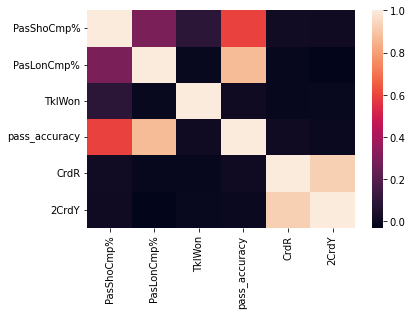

In [10]:
ht1 = sns.heatmap(defenders[def_fac + all_fac].corr());

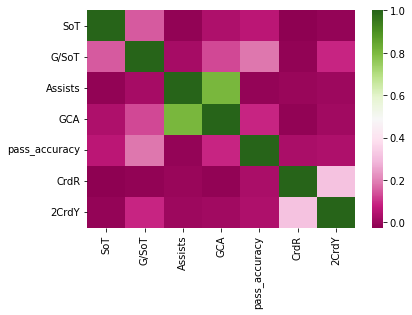

In [11]:
ht2 = sns.heatmap(attackers[atk_fac + all_fac].corr(), cmap="PiYG");

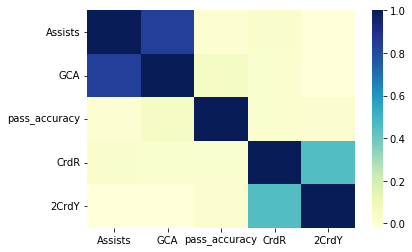

In [12]:
ht3 = sns.heatmap(midfielders[mid_fac + all_fac].corr(), cmap="YlGnBu");

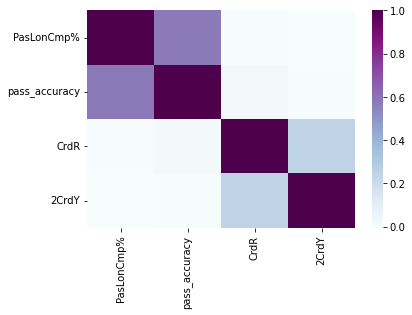

In [13]:
ht4 = sns.heatmap(goalkeepers[goal_fac + all_fac].corr(), cmap="BuPu");

In [14]:
# Checking to make sure our exlusions are taking place
len(defenders)

1136

## Milestone 3 Task 2 - Analysis Pipeline

1. Loading the data - In order to be able to load our data into out analysis we need to validate the data file 
    - Origin file is a ".csv" filetype with the delimiter of ";"
    - Origin file supports the "ISO-8859-1" encoding 
2. Preprocessing the data - To make our workflow more efficient we can drop unnessary columns that doesn't relate to our analysis 
*Note: Columns can be added or removed as we move forward with the analysis, so this section may change*

| Dropped Column | Description | Reason |
| -------------- | ----------- | ------ |
| Born | Year of birth | Our dataset already includes the ages of the places, therefore, making this column redundant|
|PPA| Completed passes into the 18-yard box | Irrelavent to Analysis        |
|CrsPA| Completed crosses into the 18-yard box | Irrelavent to Analysis        |
| CkIn | Inswinging corner kicks | Irrelavent to Analysis |
| CkOut | Outswinging corner kicks | Irrelavent to Analysis |
| CkStr | Straight corner kicks | Irrelavent to Analysis |
| OG | Own goals | Own goals can be biased, but it depends on the situvation, since we can't factor that into consideration, I believe I shouldn't include it |

3. Data cleansing - We also need to clean our data so its readable and doens't include any anomalies that may affect our code.
    - changing NAN values to the default datatype value (blank string if the column datatype is String, 0 if its int, etc.)
    - Identify false/incorrect data and adjust accordingly
    - Dropping columns with 10% or more missing data, to provide a fair analysis


4. Processing Data - In this step, we manipulate the data to find/create data thats suitable and supportive of our upcoming analysis
    - Creating supporting columns for out analysis
    | Column name | Description |
    | ----------- | ----------- |
    | Average Playtime | Minutes Played/Games Played , In this column we are using 2 pre-existing columns to create a column that contains the average playtime for each player |
    | *Example Name* | *Example Description* |
    - Replacing outlier values with the average of the column exluding the outliers
    
    
5. Wrangle Data
    - Create seperate datasets for each position to make analysis for each position easier
    - placeholder2
    
    
6. Exploratory Data Analysis
    - placeholder1
    - placeholder2
    
    
7. Data Analysis
    - placeholder1
    - placeholder2
    
    
8. Exporting
    - placeholder1
    - placeholder2

## Milestone 3 Task 4 - Analysis to answer the research question

### Comparisons for each position

 - DF:Defender {identifying factors : average time played(90s) vs Tackles in 1/3 defense zone ("TklDef3rd")}

 - MF:Midfielder {identifying factors : Pass completion percentage (PasTotCmp%) vs received passes ("Rec" & "Rec%")}

 - FW:Forward {identifying factors : dribbles that lead to a shot attempt("ScaDrib") vs Shots on target percentage(SoT%)}

 - GK:Goalkeeper {identifying factors : passes to defenders into open space(TB) vs inverse of Own goals(1-OG)}

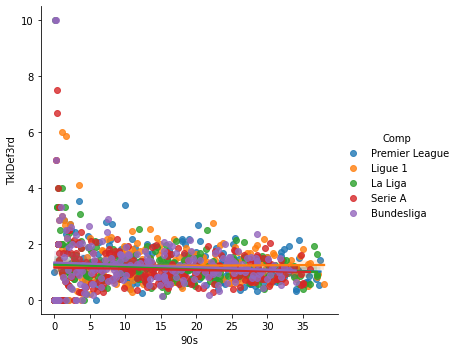

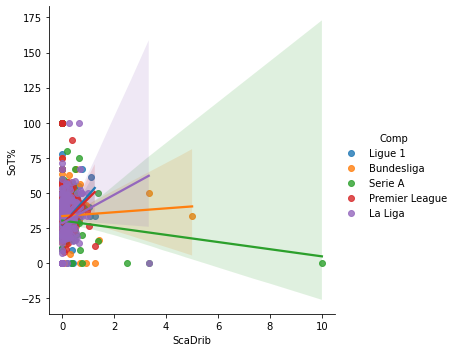

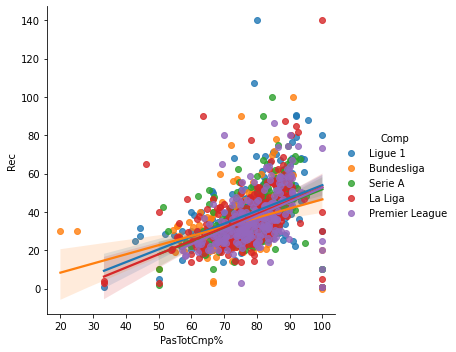

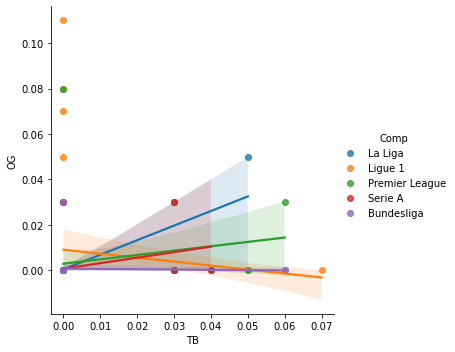

In [15]:
sns.lmplot(x="90s", y="TklDef3rd", data=defenders, hue="Comp");
sns.lmplot(x="ScaDrib", y="SoT%", data=attackers, hue="Comp");
sns.lmplot(x="PasTotCmp%", y="Rec", data=midfielders, hue="Comp");
sns.lmplot(x="TB", y="OG", data=goalkeepers, hue="Comp");


In [16]:
main_pos = df.copy().set_index("Rk")
temp_df = pd.DataFrame(columns=all_columns)

        
temp_holder= list(main_pos["Pos"])
        
for each in range(0,len(main_pos["Pos"])):
    if len(temp_holder[each])>2:
        temp_holder[each] = [temp_holder[each][0:2],temp_holder[each][2:4]]
    else:
        temp_holder[each] = [temp_holder[each]]
        
main_pos["Pos"] = temp_holder
main_pos = main_pos.explode("Pos")

            
sns.scatterplot(x = main_pos["TklWon"],y = main_pos["Fls"],hue = main_pos["Pos"], s =10)

KeyError: "None of ['Rk'] are in the columns"

In [ ]:
main_pos.head()

In [ ]:
x = sns.lmplot(x="TklWon", y="Fls", data=main_pos, hue="Pos",height=10);

In [193]:
y = sns.lmplot(x="GCA", y="pass_accuracy", data=main_pos, hue="Pos",height=10);

NameError: name 'main_pos' is not defined

# Milestone 3 v2.0

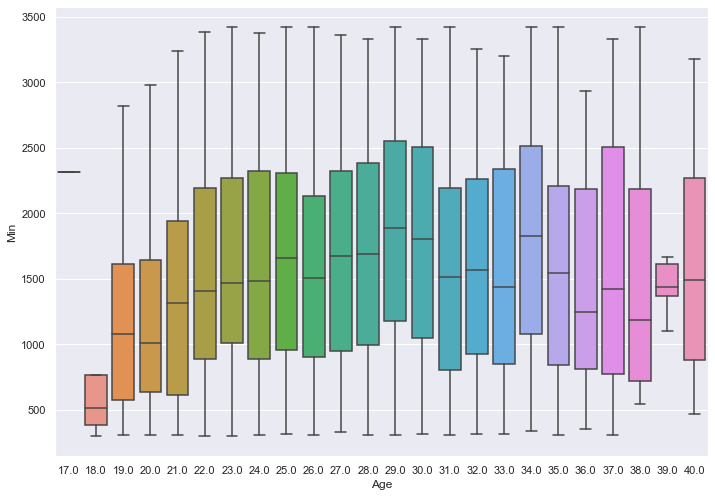

In [229]:
bp = sns.boxplot(data = df,x = "Age",y = "Min",showfliers = False)

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

This graph shows us that most of the experienced players lie above the age of 22, as the box range significantly increases at that age compared to younger ages. However, we would expect that after a certain age the graph should start to dib back down. This does happen a little bit after the ages 29 and 30 but we don't see as much of a significant change as we did before. Moreover, as the ages increase beyond 30 we should see more dips in the graph, but, instead we see some increases at age 34 and 37. I believe this is due to some exceptional players bringing up the box for other players.

In [215]:
# agedata = []

# for each in range(22,32):
#     agedata.append(df[df["Age"]==eac   
    
dff = df[df["Age"]>=22]
dff = dff[dff["Age"]<=32]

# "Goals", "PasTotCmp", "Tkl", "Assists", "DriSucc"
# (/1.08*100) , (/96.1*100), (/5.88*100), (/0.83*100), (/5.58*100)


# Att : Goals, GCA, SoT
# Mid : PasTotCmp, DriSucc, Assists
# Def : Tkl, Int, Blocks

sns.set(rc={'figure.figsize':(11.7,8.27)})
dff = dff.drop(dff[dff.Min < 300].index)

Weighted_Score = 0.5*(dff["Goals"]/1.04)*100 + 0.25*(df["GCA"]/1.13)*100 + 0.25*(df["SoT"]/2.22)*100
dff["Weighted_Score"] = Weighted_Score
Atk = dff[dff["Pos"].str.contains("FW")]


Weighted_Score = 0.4*(dff["PasTotCmp"]/96.1)*100 + 0.5*(df["DriSucc"]/5.13)*100 + 0.35*(df["Assists"]/0.83)*100
dff["Weighted_Score"] = Weighted_Score
Mid = dff[dff["Pos"].str.contains("MF")]


Weighted_Score = 0.3*(dff["Tkl"]/5.88)*100 + 0.35*(df["Int"]/5.22)*100 + 0.3*(df["Blocks"]/4.5)*100
dff["Weighted_Score"] = Weighted_Score
Def = dff[dff["Pos"].str.contains("DF")]

# Weighted_Score = 0.3*(df["Goals"]/1.08)*100 + 0.2*(df["PasTotCmp"]/96.1)*100 + 0.2*(df["Tkl"]/5.88)*100 + 0.2*(df["Assists"]/0.83)*100 + 0.1*(df["DriSucc"]/5.58)*100 






For the following graphs, we have calculated a weighted score for each position considering facotrs that apply to that specific position.

**eg, For attackers I chose: Goals, Shots on target, Goal creating actions. **

This helps us to create a better visualisation as some of these factors are more important than others, therefore, adding a weightage to each factor according to their significance provides us with better data. 

<AxesSubplot:xlabel='Age', ylabel='Weighted_Score'>

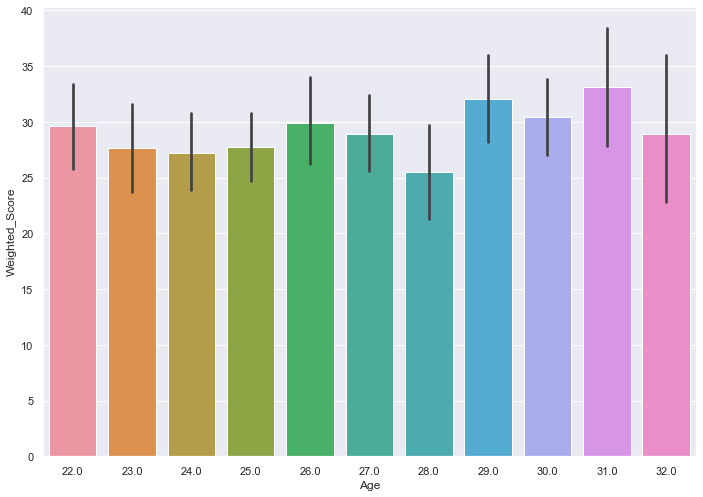

In [196]:
sns.barplot(data = Atk, x = "Age", y = "Weighted_Score")

From the graph we can see that Attackers tend to peak between the ages 26 and 31, according to online sources such as "The Athletic", strikers can start to peek around 22 years old and may continue to peak until 31. Even though, they state that the prime age would be around 27, our results are still within their age range, therefore, confirming our analysis.

<AxesSubplot:xlabel='Age', ylabel='Weighted_Score'>

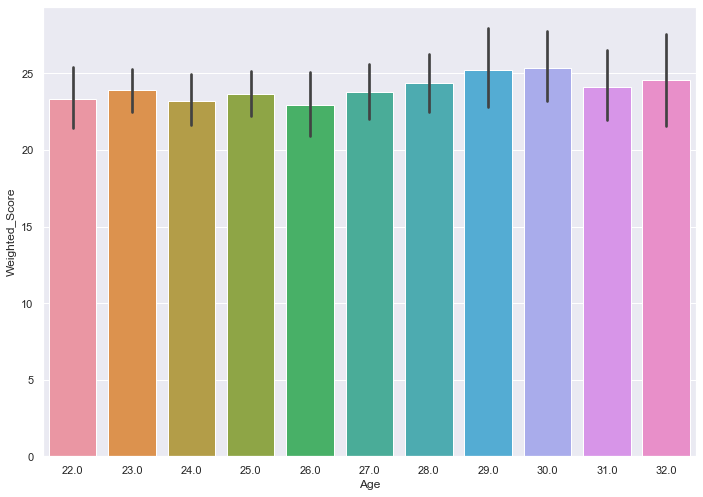

In [197]:
sns.barplot(data = Mid, x = "Age", y = "Weighted_Score")

For this graph, we can see that the graph is fairly steady until it reaches the age 27, where the bars start to increase until 31, where they do fall a little but they still remain high compared to others. Therefore, we can identify that Midfielders peak between the ages 27 and 30. Which again have the same correlation with online source as the Attackers did. Attackers and Midfields do also seem to peak around the same age, which is again verified with general football statistics as they both seem to start peaking around 22 up until 31. 

<AxesSubplot:xlabel='Age', ylabel='Weighted_Score'>

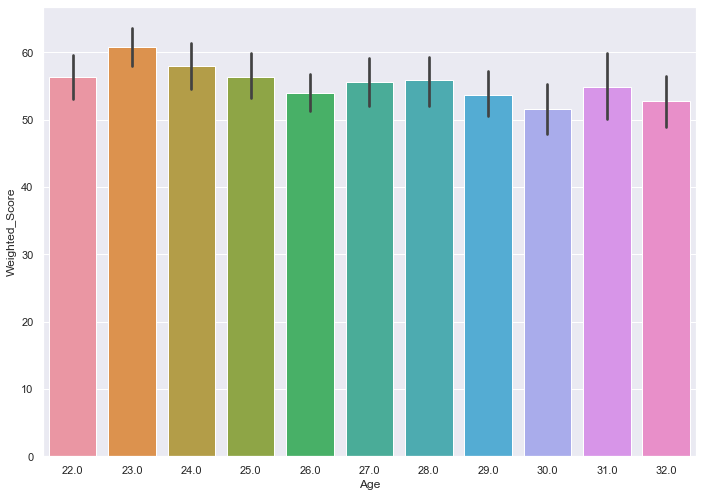

In [216]:
sns.barplot(data = Def, x = "Age", y = "Weighted_Score")

In this graph, we see some confusing results as it starts by peaking and decreases as age increases. This is not what we would expect as younger players don't have much overall experience and are still getting better with each game. I believe we see these results because the weightage of all the factors for defenders are quite close togehter, meaning that the weight being added aren't have much of an impact. Moreover, If I substitute midfielders for defenders in this graph, we see a similar result, this is because, midfielders and defenders have similar play styles which gets reflected. I have expimented with some other factors that I believe may have been better suited to capture defenders in their prime, however, most of them had the same result as shown by the trials below. Therefore, I can conclude that our analysis for defender's is insufficent and require more detailed data.

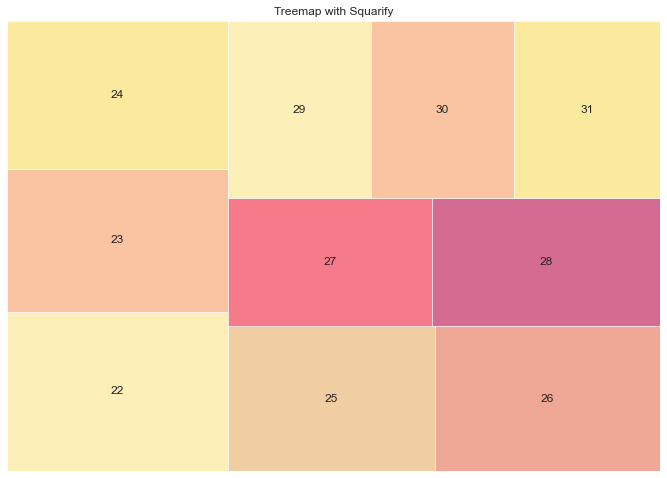

In [187]:
xyz =[]

for each in range(22,32):
    xyz.append(new_df[new_df["Age"] == each]["DriSucc"].mean())

colors=['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c'] #color palette
sns.set_style(style="whitegrid") # set seaborn plot style
sizes= df["Touches"].values# proportions of the categories
label=range(22,32)
squarify.plot(sizes=xyz,label=label ,alpha=0.6,color=colors).set(title='Treemap with Squarify')
plt.axis('off')
plt.show()

This graph is a treemap of players' ages where the size of each block/rectangle refers to the Sucessful Dribbles factor (The larger the size, the more dribbles in a certain age group). The grpah indicates that younger players (age : 22 - 24) have significantly more dribbles compared to older players. I believe this is because, dribbling is one of the many ways younger players improve. Dribbling helps them with better touches on the ball, more accurate passes. I think the younger players employ this stratagy due to them not being experienced enough, and therefore, still having the mindset they had on training grounds. 

## Observations

- Attackers and Midfields between the ages 26 and 31 have better stats compared to players outside this range.
- According to our graphs, The most prominent age for
    - Attackers is indicated between 29-31
    - Midfielders is indicated at 29-30
    - Defenders is indicated at 23
- Younger players (<=24) are still in more of a trainning midset, than a professional football game.

## Dataset Reliability

As I conclude my analysis of the "2021-2022 Football Player Stats" dataset with the research question "Identidy the prime age of playing for this dataset and comparing it to top players in their prime.", we need to keep in mind that this analysis applies to only this dataset, and we need to consider the reliability of it.

Reliablity factors:

- Source: Open source public dataset uploaded by a fan
- Primary Source : Unknown
- Time Uploaded: ~May or June 2022
- How data was collected: Unknown
- Why was the dataset created: Hobbie/Unknown

Considering the factors mentioned above among others, I believe this dataset is a valid representation of Football player statistics from an enthusiast's point of view. Currently, the dataset doesn't contain very detailed data, the primary source and how the data was collected is Unknown, therefore we cannot consider it to be fully reliable data.

## Conclusion

Essentially, the dataset contains some very useful statistics that led to my conclusions, However, as mentioned in the Dataset Reliability section there are an array of details missing about the sources of the data. Therefore, this analysis is completly speculative and require more information about the dataset in order produce a concrete result. 

From our analysis we are able to pin point certain age ranges for a football player to be in their prime, we considered the different positions players play and what factors may affect them. Using this information, we have come to the conclusion that young players, under the age of 24, haven't been explosed to enough gametime and are still partially in the trainning mindset. Therefore, we can eliminate them as potental players in their primes and continue our analysis. We then used the players' positions and suitable factors to compare them, coming to the conclustion that Attacker's and Midfielder's have similar prime ages of around 26 to 31. We then looked into our visualisation with more detail to find the strict limits for players in their prime using the same factors. As expected we found our ages to be 29-31 for Attackers and 29-30 for Midfielders, which both lie in our soft range. Unfortunately, we couldn't identify the prime age for defenders due to a lack of information regarding older players. We came to this conclusion after comparing then number of older players to younger, where we found that there are twice as many younger players as older with the seperation age being 28. Even though this may be true for all positions, I believe that there may be more anomalies or skewed data within the defenders. Therefore, leading us to this result. Lastly, I decided not to analyse goalkeepers simply due to the lack of relevant factors in the dataset for their position, hence, it logical to estimate their prime age.